# Assignment 5.  




## Queries with Aggregations

Read chapters 12 and 13

We will use DataJoint to solve these problems and then review the same solutions in SQL.


## Connect to the database server


In [1]:
import datajoint as dj

In [2]:
[s for s in dj.list_schemas() if s.startswith('shared_dj')]

Connecting dimitri@db.data-science-ust.net:3306


['shared_dj_bowling',
 'shared_dj_entertainment',
 'shared_dj_recipes',
 'shared_dj_sales',
 'shared_dj_school',
 'shared_dj_school2']

In [3]:
# schema = dj.schema('shared_dj_entertainment')
# schema = dj.schema('shared_dj_recipes')
# schema = dj.schema('shared_dj_school')
# schema = dj.schema('shared_dj_bowling')
schema = dj.schema('shared_dj_sales')
schema.spawn_missing_classes()

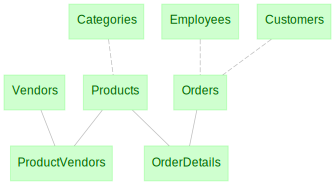

In [4]:
dj.Diagram(schema)

In [5]:
dj.config['display.limit'] = 7

## Simple Query

In [6]:
Customers()

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1001,Suzanne,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2686
1002,William,Thompson,122 Spring River Drive,Duvall,WA,98019,425,555-2681
1003,Gary,Hallmark,"Route 2, Box 203B",Auburn,WA,98002,253,555-2676
1004,Robert,Brown,672 Lamont Ave,Houston,TX,77201,713,555-2491
1005,Dean,McCrae,4110 Old Redmond Rd.,Redmond,WA,98052,425,555-2506
1006,John,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2511
1007,Mariya,Sergienko,901 Pine Avenue,Portland,OR,97208,503,555-2526


## Fetching

In [7]:
arr = Customers().fetch()  # retrieve as a numpy recarray

In [8]:
dicts = Customers().fetch(as_dict=True)  # retrieve as a list of dictionaries

In [9]:
df = Customers().fetch(format='frame')  # retrieve as a pandas dataframe

## Restriction

In [10]:
Customers() & {'cust_state': 'WA'}  # restrict by a dict

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1001,Suzanne,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2686
1002,William,Thompson,122 Spring River Drive,Duvall,WA,98019,425,555-2681
1003,Gary,Hallmark,"Route 2, Box 203B",Auburn,WA,98002,253,555-2676
1005,Dean,McCrae,4110 Old Redmond Rd.,Redmond,WA,98052,425,555-2506
1006,John,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2511
1009,Andrew,Cencini,507 - 20th Ave. E. Apt. 2A,Seattle,WA,98105,206,555-2601
1011,Alaina,Hallmark,"Route 2, Box 203B",Woodinville,WA,98072,425,555-2631


In [11]:
Customers() & 'cust_state ="WA"'   # restrict by string

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1001,Suzanne,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2686
1002,William,Thompson,122 Spring River Drive,Duvall,WA,98019,425,555-2681
1003,Gary,Hallmark,"Route 2, Box 203B",Auburn,WA,98002,253,555-2676
1005,Dean,McCrae,4110 Old Redmond Rd.,Redmond,WA,98052,425,555-2506
1006,John,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2511
1009,Andrew,Cencini,507 - 20th Ave. E. Apt. 2A,Seattle,WA,98105,206,555-2601
1011,Alaina,Hallmark,"Route 2, Box 203B",Woodinville,WA,98072,425,555-2631


In [12]:
Customers() & {'customer_id': 1001}

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1001,Suzanne,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2686


In [13]:
keys = Customers.fetch('KEY')

In [14]:
Customers & keys[2]

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1026,Kirk,DeGrasse,455 West Palm Ave,San Antonio,TX,78284,210,555-2311


In [15]:
# Give me all the products that cost more than $1000
Products() & 'retail_price > 1000'

product_number,product_name,product_description,retail_price,quantity_on_hand,category_id
1,Trek 9000 Mountain Bike,None,1200.00,6,2
2,Eagle FS-3 Mountain Bike,None,1800.00,8,2
11,GT RTS-2 Mountain Bike,None,1650.00,5,2


## Negative restriction
Customers who are not from WA

In [16]:
Customers() - {'cust_state': 'WA'}

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1004,Robert,Brown,672 Lamont Ave,Houston,TX,77201,713,555-2491
1007,Mariya,Sergienko,901 Pine Avenue,Portland,OR,97208,503,555-2526
1008,Neil,Patterson,233 West Valley Hwy,San Diego,CA,92199,619,555-2541
1010,Angel,Kennedy,667 Red River Road,Austin,TX,78710,512,555-2571
1013,Rachel,Patterson,2114 Longview Lane,San Diego,CA,92199,619,555-2546
1014,Sam,Abolrous,611 Alpine Drive,Palm Springs,CA,92263,760,555-2611
1015,Darren,Gehring,2601 Seaview Lane,Chico,CA,95926,530,555-2616


## Projection 

In [17]:
# always includes primary key
Customers.proj()

customer_id
1009
1023
1026
1003
1001
1002
1005


In [18]:
q = Customers.proj('cust_last_name', 'cust_first_name')

In [19]:
q

customer_id,cust_first_name,cust_last_name
1001,Suzanne,Viescas
1002,William,Thompson
1003,Gary,Hallmark
1004,Robert,Brown
1005,Dean,McCrae
1006,John,Viescas
1007,Mariya,Sergienko


In [20]:
Products()

product_number,product_name,product_description,retail_price,quantity_on_hand,category_id
1,Trek 9000 Mountain Bike,None,1200.00,6,2
2,Eagle FS-3 Mountain Bike,None,1800.00,8,2
3,Dog Ear Cyclecomputer,None,75.00,20,1
4,Victoria Pro All Weather Tires,None,54.95,20,4
5,Dog Ear Helmet Mount Mirrors,None,7.45,12,1
6,Viscount Mountain Bike,None,635.00,5,2
7,Viscount C-500 Wireless Bike Computer,None,49.00,30,1


In [21]:
q = Products().proj('product_name', 'retail_price', 
                    stock_value='retail_price * quantity_on_hand')
q 

product_number,product_name,retail_price,stock_value calculated attribute
1,Trek 9000 Mountain Bike,1200.00,7200.00
2,Eagle FS-3 Mountain Bike,1800.00,14400.00
3,Dog Ear Cyclecomputer,75.00,1500.00
4,Victoria Pro All Weather Tires,54.95,1099.00
5,Dog Ear Helmet Mount Mirrors,7.45,89.40
6,Viscount Mountain Bike,635.00,3175.00
7,Viscount C-500 Wireless Bike Computer,49.00,1470.00


In [22]:
# give me all products whose stock value is over 5000
(q & 'stock_value > 5000').proj('stock_value')

product_number,stock_value calculated attribute
1,7200.00
2,14400.00
11,8250.00
37,7560.00


## Restricting with another query 


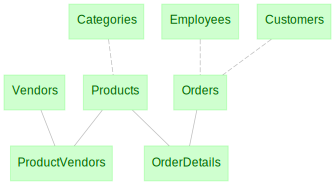

In [23]:
dj.Diagram(schema)

In [24]:
# All customers who have made an order

Customers & Orders

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1001,Suzanne,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2686
1002,William,Thompson,122 Spring River Drive,Duvall,WA,98019,425,555-2681
1003,Gary,Hallmark,"Route 2, Box 203B",Auburn,WA,98002,253,555-2676
1004,Robert,Brown,672 Lamont Ave,Houston,TX,77201,713,555-2491
1005,Dean,McCrae,4110 Old Redmond Rd.,Redmond,WA,98052,425,555-2506
1006,John,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2511
1007,Mariya,Sergienko,901 Pine Avenue,Portland,OR,97208,503,555-2526


In [25]:
# All customers who have not made an order

Customers - Orders

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1028,Jeffrey,Tirekicker,19541 104th Ave NE,Bothell,WA,98006,425,555-9999


In [26]:
(Customers & Orders).make_sql()

'SELECT * FROM `shared_dj_sales`.`customers` WHERE ((`customer_id`) in (SELECT `customer_id` FROM `shared_dj_sales`.`orders`))'

In [27]:
# Give me all orders for items whose price exceeds $1000

In [28]:
expensive_products = Products & 'retail_price > 1000'
big_orders = Orders & (OrderDetails & expensive_products)
big_orders

order_number,order_date,ship_date,customer_id,employee_id
1,2017-09-02,2017-09-05,1018,707
3,2017-09-02,2017-09-05,1002,707
4,2017-09-02,2017-09-04,1009,703
5,2017-09-02,2017-09-02,1024,708
6,2017-09-02,2017-09-06,1014,702
10,2017-09-02,2017-09-05,1012,701
11,2017-09-03,2017-09-05,1020,706


In [29]:
big_orders.make_sql()

'SELECT * FROM `shared_dj_sales`.`orders` WHERE ((`order_number`) in (SELECT `order_number` FROM `shared_dj_sales`.`order_details` WHERE ((`product_number`) in (SELECT `product_number` FROM `shared_dj_sales`.`products` WHERE (retail_price > 1000)))))'

In [30]:
# Show all products from the category "Bikes"
bikes = Categories() & 'category_description = "Bikes"'
Products() & bikes

product_number,product_name,product_description,retail_price,quantity_on_hand,category_id
1,Trek 9000 Mountain Bike,None,1200.00,6,2
2,Eagle FS-3 Mountain Bike,None,1800.00,8,2
6,Viscount Mountain Bike,None,635.00,5,2
11,GT RTS-2 Mountain Bike,None,1650.00,5,2


In [31]:
(Products & bikes).make_sql()

'SELECT * FROM `shared_dj_sales`.`products` WHERE ((`category_id`) in (SELECT `category_id` FROM `shared_dj_sales`.`categories` WHERE (category_description = "Bikes")))'

In [32]:
# All order IDs where the customer was from Washington
washington_customers = Customers & 'cust_state="WA"'
(Orders & washington_customers).proj()

order_number
2
7
16
52
55
107
137


## Joins 

In [33]:
Products * Categories

product_number,category_id,product_name,product_description,retail_price,quantity_on_hand,category_description
3,1,Dog Ear Cyclecomputer,None,75.00,20,Accessories
5,1,Dog Ear Helmet Mount Mirrors,None,7.45,12,Accessories
7,1,Viscount C-500 Wireless Bike Computer,None,49.00,30,Accessories
8,1,Kryptonite Advanced 2000 U-Lock,None,50.00,20,Accessories
9,1,Nikoma Lok-Tight U-Lock,None,33.00,12,Accessories
10,1,Viscount Microshell Helmet,None,36.00,20,Accessories
18,1,Viscount CardioSport Sport Watch,None,179.00,12,Accessories


In [34]:
(Products * Categories & 'category_description = "Bikes"').proj('product_name', 'retail_price')

product_number,category_id,product_name,retail_price
1,2,Trek 9000 Mountain Bike,1200.00
2,2,Eagle FS-3 Mountain Bike,1800.00
6,2,Viscount Mountain Bike,635.00
11,2,GT RTS-2 Mountain Bike,1650.00


In [35]:
(Products & (Categories & 'category_description = "Bikes"')).proj('product_name', 'retail_price')

product_number,product_name,retail_price
1,Trek 9000 Mountain Bike,1200.00
2,Eagle FS-3 Mountain Bike,1800.00
6,Viscount Mountain Bike,635.00
11,GT RTS-2 Mountain Bike,1650.00


In [36]:
# All the orders that took more than 2 days to ship
Orders().proj(days_to_ship='DATEDIFF(ship_date, order_date)') & 'days_to_ship > 2'

order_number,days_to_ship calculated attribute
1,3
3,3
6,4
7,3
9,3
10,3
12,3


In [37]:
ProductVendors()

product_number,vendor_id,wholesale_price,days_to_deliver
1,4,804.00,6
1,9,854.22,7
2,6,1269.00,9
2,9,1477.81,7
3,7,54.19,10
3,9,57.27,6
4,6,44.22,10


In [38]:
discounts = OrderDetails * Products & 'quoted_price < retail_price'
(Orders & discounts).proj('order_date')

order_number,order_date
1,2017-09-02
3,2017-09-02
4,2017-09-02
5,2017-09-02
6,2017-09-02
8,2017-09-02
11,2017-09-03


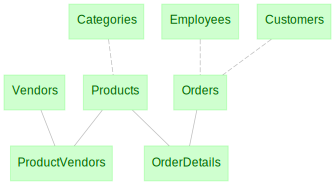

In [39]:
dj.Diagram(schema)

In [40]:
# Find all orders with products that have vendors from TX
Orders & (OrderDetails * Products * ProductVendors * Vendors & 'vend_state = "TX"')

order_number,order_date,ship_date,customer_id,employee_id
1,2017-09-02,2017-09-05,1018,707
2,2017-09-02,2017-09-04,1001,703
3,2017-09-02,2017-09-05,1002,707
4,2017-09-02,2017-09-04,1009,703
5,2017-09-02,2017-09-02,1024,708
6,2017-09-02,2017-09-06,1014,702
7,2017-09-02,2017-09-05,1001,708


In [41]:
# Give all products some vendors are from TX
Products & (ProductVendors * Vendors & 'vend_state="TX"')

product_number,product_name,product_description,retail_price,quantity_on_hand,category_id
1,Trek 9000 Mountain Bike,None,1200.00,6,2
2,Eagle FS-3 Mountain Bike,None,1800.00,8,2
3,Dog Ear Cyclecomputer,None,75.00,20,1
4,Victoria Pro All Weather Tires,None,54.95,20,4
5,Dog Ear Helmet Mount Mirrors,None,7.45,12,1
6,Viscount Mountain Bike,None,635.00,5,2
8,Kryptonite Advanced 2000 U-Lock,None,50.00,20,1


In [42]:
# Advanced: Give all products where all vendors are from TX
Products - (ProductVendors * Vendors - 'vend_state="TX"')

product_number,product_name,product_description,retail_price,quantity_on_hand,category_id
22,Pro-Sport 'Dillo Shades,None,82.00,18,1
25,King Cobra Helmet,None,139.00,30,1
38,Cycle-Doc Pro Repair Stand,None,166.00,12,1


In [43]:
# rename "retail_price" into "price"
Products().proj(..., price='retail_price')

product_number,product_name,product_description,price,quantity_on_hand,category_id
1,Trek 9000 Mountain Bike,None,1200.00,6,2
2,Eagle FS-3 Mountain Bike,None,1800.00,8,2
3,Dog Ear Cyclecomputer,None,75.00,20,1
4,Victoria Pro All Weather Tires,None,54.95,20,4
5,Dog Ear Helmet Mount Mirrors,None,7.45,12,1
6,Viscount Mountain Bike,None,635.00,5,2
7,Viscount C-500 Wireless Bike Computer,None,49.00,30,1


In [44]:
Customers() * Products()

customer_id,product_number,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number,product_name,product_description,retail_price,quantity_on_hand,category_id
1001,1,Suzanne,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2686,Trek 9000 Mountain Bike,None,1200.00,6,2
1002,1,William,Thompson,122 Spring River Drive,Duvall,WA,98019,425,555-2681,Trek 9000 Mountain Bike,None,1200.00,6,2
1003,1,Gary,Hallmark,"Route 2, Box 203B",Auburn,WA,98002,253,555-2676,Trek 9000 Mountain Bike,None,1200.00,6,2
1004,1,Robert,Brown,672 Lamont Ave,Houston,TX,77201,713,555-2491,Trek 9000 Mountain Bike,None,1200.00,6,2
1005,1,Dean,McCrae,4110 Old Redmond Rd.,Redmond,WA,98052,425,555-2506,Trek 9000 Mountain Bike,None,1200.00,6,2
1006,1,John,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2511,Trek 9000 Mountain Bike,None,1200.00,6,2
1007,1,Mariya,Sergienko,901 Pine Avenue,Portland,OR,97208,503,555-2526,Trek 9000 Mountain Bike,None,1200.00,6,2


In [45]:
OrderDetails() * Orders()

order_number,product_number,quoted_price,quantity_ordered,order_date,ship_date,customer_id,employee_id
1,1,1200.00,2,2017-09-02,2017-09-05,1018,707
1,6,635.00,3,2017-09-02,2017-09-05,1018,707
1,11,1650.00,4,2017-09-02,2017-09-05,1018,707
1,16,28.00,1,2017-09-02,2017-09-05,1018,707
1,21,55.00,3,2017-09-02,2017-09-05,1018,707
1,26,121.25,5,2017-09-02,2017-09-05,1018,707
1,40,174.60,6,2017-09-02,2017-09-05,1018,707


## Renaming attributes to control joins

In [46]:
schema = dj.schema('shared_dj_sales')
schema.spawn_missing_classes()

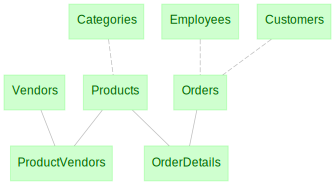

In [47]:
dj.Diagram(schema)

In [48]:
# List all pairs of customers who live in the same cities

In [49]:
c1 = Customers().proj(id1='customer_id', name1='cust_first_name', city1='cust_city')
c2 = Customers().proj(id2='customer_id', name2='cust_first_name', city2='cust_city') 
customer_pairs = c1 * c2 & 'id2 > id1'
customer_pairs & 'city1=city2'

id1,id2,name1,city1,name2,city2
1001,1005,Suzanne,Redmond,Dean,Redmond
1001,1006,Suzanne,Redmond,John,Redmond
1005,1006,Dean,Redmond,John,Redmond
1007,1027,Mariya,Portland,Luke,Portland
1008,1013,Neil,San Diego,Rachel,San Diego
1009,1023,Andrew,Seattle,Julia,Seattle
1012,1020,Liz,Bellevue,Joyce,Bellevue


## Aggregation

Aggregation works similarly to `proj` but it allows computing aggregation functions (sum, count, avg) of related items in a second query.

In [50]:
# List the number of order details on each order

In [51]:
OrderDetails()

order_number,product_number,quoted_price,quantity_ordered
1,1,1200.00,2
1,6,635.00,3
1,11,1650.00,4
1,16,28.00,1
1,21,55.00,3
1,26,121.25,5
1,40,174.60,6


In [52]:
order_details = OrderDetails.proj(..., amount='quoted_price * quantity_ordered')
Orders().aggr(
    order_details, 'order_date', number_of_items='count(*)', 
    total_amount='sum(amount)')

order_number,order_date,number_of_items calculated attribute,total_amount calculated attribute
1,2017-09-02,7,12751.85
2,2017-09-02,2,816.00
3,2017-09-02,8,11912.45
4,2017-09-02,5,6601.73
5,2017-09-02,3,5544.75
6,2017-09-02,7,9820.29
7,2017-09-02,2,467.85


In [53]:
# List the number of orders placed by each customer.
Customers.aggr(Orders, n='count(*)')

customer_id,n calculated attribute
1001,44
1002,40
1003,35
1004,39
1005,40
1006,27
1007,36


In [54]:
# List the total amount that each customer spent in 2018.

orders2018 = Orders & 'year(order_date)=2018'
order_items = (orders2018 * OrderDetails).proj('customer_id',
    amount='quoted_price*quantity_ordered')
Customers.aggr(order_items, total_amount='sum(amount)')

customer_id,total_amount calculated attribute
1001,13604.61
1002,90577.22
1003,6239.19
1004,46842.75
1005,104893.50
1006,105222.48
1007,69870.87


In [55]:
# simpler version
Customers.aggr(
    Orders * OrderDetails & 'year(order_date)=2018', 
    total_amount='sum(quoted_price*quantity_ordered)')

customer_id,total_amount calculated attribute
1001,13604.61
1002,90577.22
1003,6239.19
1004,46842.75
1005,104893.50
1006,105222.48
1007,69870.87


In [56]:
# List the total sales for each employee. 
Employees.aggr(
    Orders * OrderDetails, 'emp_first_name',
    total_amount='sum(quoted_price*quantity_ordered)')

employee_id,emp_first_name,total_amount calculated attribute
701,Ann,507361.89
702,Mary,590710.16
703,Matt,459096.87
704,Carol,597457.38
705,Kirk,557236.91
706,David,501506.25
707,Kathryn,736127.67


In [57]:
# List the total sales (number of items and total amounts) 
# for each product.
Products.aggr(OrderDetails,
             number_items='sum(quantity_ordered)',
             total_amount='sum(quoted_price*quantity_ordered)')

product_number,number_items calculated attribute,total_amount calculated attribute
1,1857,2192616.00
2,70,124002.00
3,30,2238.75
5,105,767.73
6,642,400678.65
7,374,18046.70
8,122,5999.50


In [58]:
# fetch the product with highest total sales 
Products.aggr(OrderDetails,
             number_items='sum(quantity_ordered)',
             total_amount='sum(quoted_price*quantity_ordered)').fetch(
    limit=1, order_by='total_amount desc', format='frame')

,number_items,total_amount
product_number,,
1,1857,2192616.00


## Universal Sets

In [59]:
# List all cities with customers

In [60]:
Customers.proj('cust_city')  # this lists all customers with their cities

customer_id,cust_city
1001,Redmond
1002,Duvall
1003,Auburn
1004,Houston
1005,Redmond
1006,Redmond
1007,Portland


In [61]:
dj.U('cust_city') & Customers

cust_city
Redmond
Duvall
Auburn
Houston
Portland
San Diego
Seattle


In [62]:
# Give me all sale dates

In [63]:
dj.U('order_date') & Orders

order_date
2017-09-02
2017-09-03
2017-09-04
2017-09-05
2017-09-06
2017-09-07
2017-09-08


In [64]:
# List the number of customers in each city
dj.U('cust_city').aggr(Customers(), n='count(*)')

cust_city,n calculated attribute
Auburn,1
Austin,1
Bellevue,2
Bothell,1
Chico,1
Dallas,1
Duvall,1


In [65]:
# How many total orders have been made
dj.U().aggr(Orders, n='count(*)')

n calculated attribute
944


In [66]:
# List all vendor states (or zip codes)

dj.U('vend_state', 'vend_zip_code') & Vendors()

vend_state,vend_zip_code
WA,98001
MO,63127
WA,91324
NY,12012
WA,98052
AK,99209
NY,10003


# Homework

Work with the school database.

In [67]:
schema = dj.schema('shared_dj_school')
schema.spawn_missing_classes()

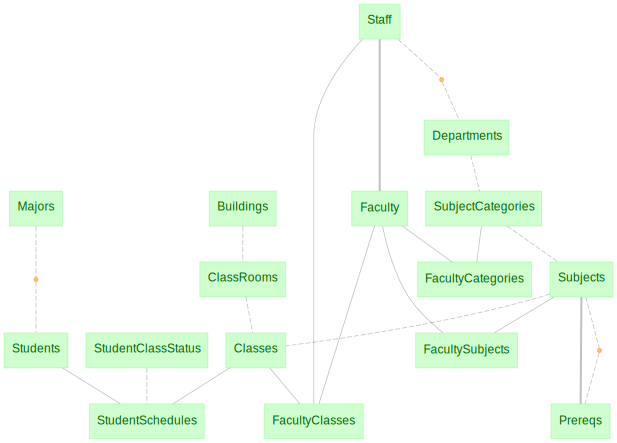

In [68]:
dj.Diagram(schema)

In [69]:
# 1.  List the names of full-time faculty
# (22 items)

In [70]:
# 2.  List the number of classes taught by each full-time faculty member
# (22 items) - solved. Note use of keep_all_rows.
(Staff * Faculty & 'status="Full Time"').aggr(
    FacultyClasses, 'stf_first_name', 'stf_lastname', n_classes='count(*)', keep_all_rows=True)

staff_id,stf_first_name,stf_lastname,n_classes calculated attribute
98005,Suzanne,Viescas,4
98007,Gary,Hallmark,4
98011,Ann,Patterson,8
98012,Robert,Brown,10
98013,Deb,Waldal,10
98014,Peter,Brehm,4
98019,Mariya,Sergienko,4


In [71]:
# 3.  List all full-time faculty who teach five or more classes
# (12 items)

In [72]:
# 4. List students' names along with their average grades
# (18 items)

In [73]:
# 5. List students with the average grade above 50.0
# (3 items)

In [74]:
# 6. List classes and the number of students registered in each
# (32 items)